# Pandas and DataFrames

- Series and DataFrames
- basic functions: head, tail, summary, sort_values
- assign
- groupby & apply

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
A = np.random.rand(3,5)

In [3]:
A

array([[0.68768427, 0.51194471, 0.53828899, 0.03838307, 0.36945629],
       [0.95277507, 0.76799778, 0.6913774 , 0.64494091, 0.06558039],
       [0.44785247, 0.21078541, 0.50314716, 0.07846162, 0.65081366]])

In [4]:
df = pd.DataFrame(A)
df

,0,1,2,3,4
0,0.687684,0.511945,0.538289,0.038383,0.369456
1,0.952775,0.767998,0.691377,0.644941,0.065580
2,0.447852,0.210785,0.503147,0.078462,0.650814


In [5]:
t = np.random.rand(10)
t

array([0.83195379, 0.06124158, 0.47533224, 0.06012994, 0.00533987,
       0.73277577, 0.49996149, 0.50085479, 0.19151351, 0.02264583])

In [6]:
s = pd.Series(t)

In [7]:
s

0    0.831954
1    0.061242
2    0.475332
3    0.060130
4    0.005340
5    0.732776
6    0.499961
7    0.500855
8    0.191514
9    0.022646
dtype: float64

# From a dictionary to a dataframe

In [8]:
D = {
    'name':['Lorenzo'],
    'age' : [31],
    'height':[179],
    'country':['Italy']    
}

In [9]:
pd.DataFrame(D)

,name,age,height,country
0,Lorenzo,31,179,Italy


In [29]:
D = {
    'name' : ['Lorenzo','Marat','Michal','Anderson','Hilliard'],
    'age'   : [31,32,36,38,31],
    'height': [179,195,170,205,176],
    'from country' : ['Italy','Russia','Netherlands','Canada','Curacao']
}

In [30]:
D

{'name': ['Lorenzo', 'Marat', 'Michal', 'Anderson', 'Hilliard'],
 'age': [31, 32, 36, 38, 31],
 'height': [179, 195, 170, 205, 176],
 'from country': ['Italy', 'Russia', 'Netherlands', 'Canada', 'Curacao']}

In [31]:
df = pd.DataFrame(D)
# Save
df.to_csv('test.csv',index=False)

In [32]:
# Load
pd.read_csv('test.csv')

,name,age,height,from country
0,Lorenzo,31,179,Italy
1,Marat,32,195,Russia
2,Michal,36,170,Netherlands
3,Anderson,38,205,Canada
4,Hilliard,31,176,Curacao


### Indexing rows and columns

In [33]:
# df.from country
df['from country']


0          Italy
1         Russia
2    Netherlands
3         Canada
4        Curacao
Name: from country, dtype: object

In [34]:
df

,name,age,height,from country
0,Lorenzo,31,179,Italy
1,Marat,32,195,Russia
2,Michal,36,170,Netherlands
3,Anderson,38,205,Canada
4,Hilliard,31,176,Curacao


In [35]:
df1 = df.loc[df['age'] < 35]

 this works but can have some problems if we start concatenating more filters

In [36]:
df.loc[lambda d: d['age'] < 35].loc[lambda d : d['height'] > 180]

,name,age,height,from country
1,Marat,32,195,Russia


In [37]:
df.loc[lambda d: (d['age'] < 35)&(d['height'] > 180)]

,name,age,height,from country
1,Marat,32,195,Russia


In [38]:
df.loc[lambda d:d['from country'] == 'Italy']

,name,age,height,from country
0,Lorenzo,31,179,Italy


In [39]:
line = 'Curacao'

In [40]:
line.startswith('C')

True

In [41]:
dataf = (df
         .replace('Curacao','Netherlands')
         .loc[lambda d: d['from country'].str.startswith('C')]
        )
dataf

,name,age,height,from country
3,Anderson,38,205,Canada


## Applying functions to a dataframe

In [42]:
df.sort_values('age', ascending=False)

,name,age,height,from country
3,Anderson,38,205,Canada
2,Michal,36,170,Netherlands
1,Marat,32,195,Russia
0,Lorenzo,31,179,Italy
4,Hilliard,31,176,Curacao


In [43]:
df.sort_values(['age','height'], ascending=True)

,name,age,height,from country
4,Hilliard,31,176,Curacao
0,Lorenzo,31,179,Italy
1,Marat,32,195,Russia
2,Michal,36,170,Netherlands
3,Anderson,38,205,Canada


In [44]:
new_entry = {
    'name' : 'Maaike',
    'age'   : 32,
    'from country' : 'Netherlands'
}

df = df.append(new_entry, ignore_index=True)

In [45]:
df

,name,age,height,from country
0,Lorenzo,31,179.0,Italy
1,Marat,32,195.0,Russia
2,Michal,36,170.0,Netherlands
3,Anderson,38,205.0,Canada
4,Hilliard,31,176.0,Curacao
5,Maaike,32,NaN,Netherlands


In [46]:
new_entry = pd.DataFrame([['Andrei',183,31,'Romania']], columns = ['name','height','age','from country'])

In [47]:
df = df.append(new_entry,ignore_index=True)

In [48]:
df

,name,age,height,from country
0,Lorenzo,31,179.0,Italy
1,Marat,32,195.0,Russia
2,Michal,36,170.0,Netherlands
3,Anderson,38,205.0,Canada
4,Hilliard,31,176.0,Curacao
5,Maaike,32,NaN,Netherlands
6,Andrei,31,183.0,Romania


## .assign

In [49]:
df.assign(kind='player')

,name,age,height,from country,kind
0,Lorenzo,31,179.0,Italy,player
1,Marat,32,195.0,Russia,player
2,Michal,36,170.0,Netherlands,player
3,Anderson,38,205.0,Canada,player
4,Hilliard,31,176.0,Curacao,player
5,Maaike,32,NaN,Netherlands,player
6,Andrei,31,183.0,Romania,player


### a bit more complicated

In [50]:
# youth_index = 50 - age

df = df.assign(youth_index = lambda d : 50 - d['age'])

df

,name,age,height,from country,youth_index
0,Lorenzo,31,179.0,Italy,19
1,Marat,32,195.0,Russia,18
2,Michal,36,170.0,Netherlands,14
3,Anderson,38,205.0,Canada,12
4,Hilliard,31,176.0,Curacao,19
5,Maaike,32,NaN,Netherlands,18
6,Andrei,31,183.0,Romania,19


In [51]:
df = df.assign(istall = lambda d : d['height'] > 190)
df

,name,age,height,from country,youth_index,istall
0,Lorenzo,31,179.0,Italy,19,False
1,Marat,32,195.0,Russia,18,True
2,Michal,36,170.0,Netherlands,14,False
3,Anderson,38,205.0,Canada,12,True
4,Hilliard,31,176.0,Curacao,19,False
5,Maaike,32,NaN,Netherlands,18,False
6,Andrei,31,183.0,Romania,19,False


In [52]:
df.loc[lambda d:d['istall']]

,name,age,height,from country,youth_index,istall
1,Marat,32,195.0,Russia,18,True
3,Anderson,38,205.0,Canada,12,True


In [53]:
df.drop(2,axis=0)

,name,age,height,from country,youth_index,istall
0,Lorenzo,31,179.0,Italy,19,False
1,Marat,32,195.0,Russia,18,True
3,Anderson,38,205.0,Canada,12,True
4,Hilliard,31,176.0,Curacao,19,False
5,Maaike,32,NaN,Netherlands,18,False
6,Andrei,31,183.0,Romania,19,False


## Index elements in the DataFrame

In [54]:
# locating elements in a dataframe
df.loc[df['istall']]

,name,age,height,from country,youth_index,istall
1,Marat,32,195.0,Russia,18,True
3,Anderson,38,205.0,Canada,12,True


In [55]:
df.assign(youth_index = lambda d : 50 - d['age'])

,name,age,height,from country,youth_index,istall
0,Lorenzo,31,179.0,Italy,19,False
1,Marat,32,195.0,Russia,18,True
2,Michal,36,170.0,Netherlands,14,False
3,Anderson,38,205.0,Canada,12,True
4,Hilliard,31,176.0,Curacao,19,False
5,Maaike,32,NaN,Netherlands,18,False
6,Andrei,31,183.0,Romania,19,False


If we just want to index by number

In [56]:
df.iloc[3]

name            Anderson
age                   38
height               205
from country      Canada
youth_index           12
istall              True
Name: 3, dtype: object

## Importing dataframe from .csv

In [57]:
df = pd.read_csv('wine.csv', index_col=0)
df.shape

(129971, 13)

In [58]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [59]:
df.loc[df['price'].isna()].shape

(8996, 13)

In [60]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [61]:
# df.head()
# df.tail()
# df.sample(3)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [62]:
df = df.loc[df['price'].isna() == False]

In [63]:
df.describe()

,points,price
count,120975.000000,120975.000000
mean,88.421881,35.363389
std,3.044508,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [64]:
ita_df = df.loc[lambda d : d['country'] == 'Italy']

In [65]:
ita_df.describe()

,points,price
count,16914.000000,16914.000000
mean,88.618186,39.663770
std,2.660785,38.052479
min,80.000000,5.000000
25%,87.000000,18.000000
50%,88.000000,28.000000
75%,90.000000,50.000000
max,100.000000,900.000000


### Group by & apply

In [66]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [67]:
result = df.groupby('country').apply(lambda d: np.std(d['points']))

### Combining more operations on the same group by

In [68]:
result = (df
          .groupby('country')
          .apply(lambda d: pd.Series({
              'average_price':np.average(d['price']),
              'std_price':np.std(d['price']),
              'average_points':np.average(d['points']),
              'std_points':np.std(d['points']),
          }))
          .reset_index()
          .assign(price_above_average = lambda d: d['average_price'] > np.average(d['average_price']))
         )

In [69]:
result

,country,average_price,std_price,average_points,std_points,price_above_average
0,Argentina,24.510117,23.427002,86.710330,3.183375,False
1,Armenia,14.500000,0.500000,87.500000,0.500000,False
2,Australia,35.437663,49.038766,88.595466,2.996117,True
3,Austria,30.762772,27.219934,90.190782,2.461865,True
4,Bosnia and Herzegovina,12.500000,0.500000,86.500000,1.500000,False
5,Brazil,23.765957,10.935425,84.659574,2.425719,False
6,Bulgaria,14.645390,9.474965,87.936170,2.070436,False
7,Canada,35.712598,19.619412,89.377953,2.390694,True
8,Chile,20.786458,21.926888,86.495471,2.700137,False
9,China,18.000000,0.000000,89.000000,0.000000,False


### Visualizations

In [70]:
df.shape

(120975, 13)

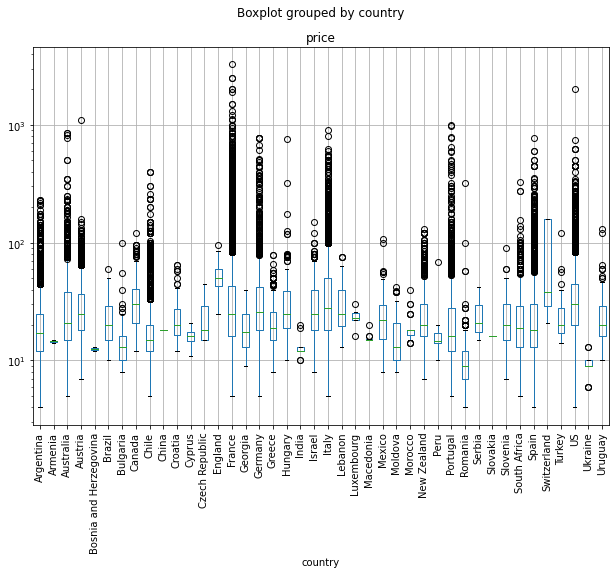

In [71]:
fig,ax = plt.subplots(figsize=(10,7))

df.boxplot('price',by='country',rot=90,ax=ax)

plt.yscale('log')

In [92]:
smaller_df = df.loc[lambda d:(d['country']=='Italy')|(d['country']=='France')]

# OR BETTER
smaller_df = df.loc[lambda d:d['country'].isin(['Italy','France'])]
smaller_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


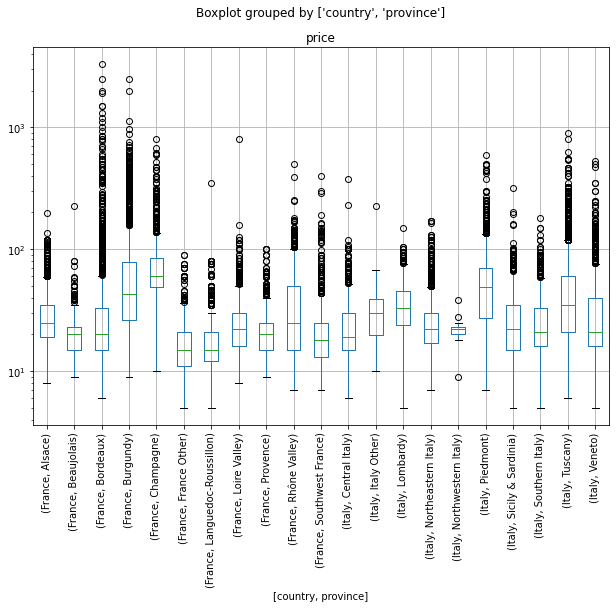

In [73]:
fig,ax = plt.subplots(figsize=(10,7))

smaller_df.boxplot('price',by=['country','province'],rot=90,ax=ax)

plt.yscale('log')

In [74]:
import seaborn as sns

(0.0, 300.0)

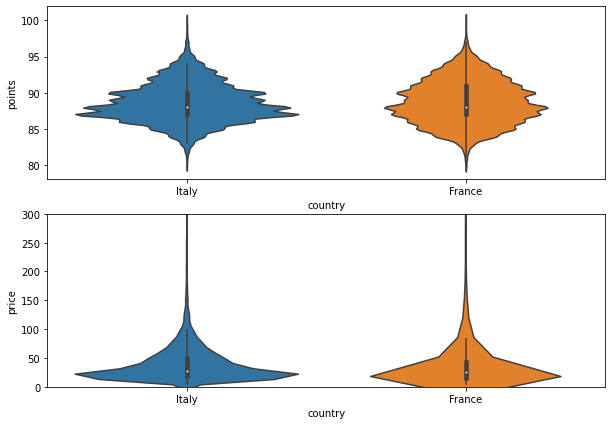

In [75]:
fig,ax = plt.subplots(nrows=2,figsize=(10,7))
sns.violinplot(x='country',y='points',data=smaller_df,ax=ax[0])
sns.violinplot(x='country',y='price',data=smaller_df,ax=ax[1])
ax[1].set_ylim([0,300])
# ax[1].set_yscale('log')

In [76]:
smaller_df.loc[lambda d:d['price'] == np.nan]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


In [77]:
# for country, c_df in df.groupby('country'):
#     print(country)

In [78]:
## Operations on subcategories: average

In [79]:
cdf = df.groupby('country').apply(lambda d : d['points'].mean())
cdf

country
Argentina                 86.710330
Armenia                   87.500000
Australia                 88.595466
Austria                   90.190782
Bosnia and Herzegovina    86.500000
Brazil                    84.659574
Bulgaria                  87.936170
Canada                    89.377953
Chile                     86.495471
China                     89.000000
Croatia                   87.352113
Cyprus                    87.181818
Czech Republic            87.250000
England                   91.550725
France                    88.734867
Georgia                   87.678571
Germany                   89.836321
Greece                    87.288503
Hungary                   89.165517
India                     90.222222
Israel                    88.496933
Italy                     88.618186
Lebanon                   87.685714
Luxembourg                88.666667
Macedonia                 86.833333
Mexico                    85.257143
Moldova                   87.203390
Morocco             

### Several properties in a DataFrame

In [80]:
from scipy.stats import pearsonr

In [81]:
def two_cols_corr(dataf,c1='points',c2='price'):
    
    if len(dataf) > 1:

        r,p = pearsonr(dataf[c1],dataf[c2])
    
    
    else:
        r =  np.nan
    
    
    return r

In [82]:
country_stats = (df
 .groupby('country')
 .apply(lambda d : pd.Series({
     'average' : d['points'].mean(),
     'std'     : d['points'].std(),
     'n'       : len(d),
     'max'     : d['points'].max(),
     'min'     : d['points'].min(),
     'points_price_corr': two_cols_corr(d)
 }))
 .reset_index()
)

In [83]:
country_stats.sort_values('points_price_corr', ascending=False)

,country,average,std,n,max,min,points_price_corr
1,Armenia,87.500000,0.707107,2.0,88.0,87.0,1.000000
19,India,90.222222,1.715938,9.0,93.0,87.0,0.707107
32,Serbia,87.500000,1.314257,12.0,89.0,86.0,0.667140
26,Moldova,87.203390,2.419601,59.0,91.0,82.0,0.573245
0,Argentina,86.710330,3.183799,3756.0,97.0,80.0,0.568168
35,South Africa,87.831400,2.345413,1293.0,95.0,82.0,0.566197
12,Czech Republic,87.250000,1.712255,12.0,89.0,84.0,0.551684
21,Italy,88.618186,2.660785,16914.0,100.0,80.0,0.528073
28,New Zealand,88.308418,2.435504,1378.0,95.0,80.0,0.483961
8,Chile,86.495471,2.700443,4416.0,95.0,80.0,0.480307


In [84]:
## Boxplots

import matplotlib.pyplot as plt



Text(0.5, 0.98, '')

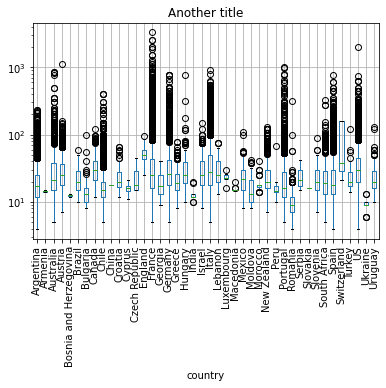

In [85]:
fig,ax = plt.subplots(1,1)


df.boxplot(column = 'price', by = 'country', rot = 90, ax = ax)

ax.set_title('Another title')
ax.set_yscale('log')
plt.suptitle('')

# plt.savefig('box.png')

In [86]:
# plt.figure(figsize = (14,8))
# df.hist('points', by = 'country',figsize=(14,8))

## extras: saeaborn

In [89]:
import seaborn as sns

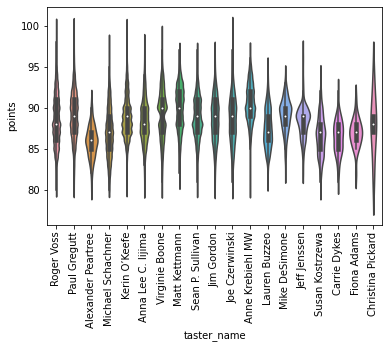

In [90]:
ax = sns.violinplot(x="taster_name", y="points", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()